In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers

from sklearn.metrics import classification_report, confusion_matrix


In [3]:
pip install --upgrade tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for h5py>=3.10.0 from https://files.pythonhosted.org/packages/b6/35/ed21094eb4d8acf31ccc7666a4d8701c1ce38f8d1fa3c7036f24416f6337/h5py-3.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for ml-dtypes~=0.3.1 from https://files.pythonhosted.org/packages/a4/db/1784b87285588788170f87e987bfb4bda218d62a70a81ebb66c94e7f9b95/ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorboard<2.17,>=2.16 from https://files.pythonhosted.org/packages/3a/d0/b9788

In [2]:
# Load CIFAR-10 dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [6]:
# Define data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


In [7]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
#  Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=20, 
                    validation_data=(test_images, test_labels))


Epoch 1/20


1562/1562 [==============================] - 78s 48ms/step - loss: 1.7188 - accuracy: 0.0999 - val_loss: 1.3741 - val_accuracy: 0.1266
Epoch 2/20
1562/1562 [==============================] - 72s 46ms/step - loss: 1.4496 - accuracy: 0.0934 - val_loss: 1.2080 - val_accuracy: 0.1139
Epoch 3/20
1562/1562 [==============================] - 66s 42ms/step - loss: 1.3406 - accuracy: 0.0937 - val_loss: 1.1206 - val_accuracy: 0.0993
Epoch 4/20
1562/1562 [==============================] - 74s 47ms/step - loss: 1.2724 - accuracy: 0.0959 - val_loss: 1.1588 - val_accuracy: 0.0673
Epoch 5/20
1562/1562 [==============================] - 72s 46ms/step - loss: 1.2222 - accuracy: 0.0988 - val_loss: 1.0240 - val_accuracy: 0.1005
Epoch 6/20
1562/1562 [==============================] - 76s 49ms/step - loss: 1.1750 - accuracy: 0.0984 - val_loss: 1.0137 - val_accuracy: 0.0951
Epoch 7/20
1562/1562 [==============================] - 79s 51ms/step - loss: 1.1433 - accuracy: 0.0996 - val_loss: 1.0351

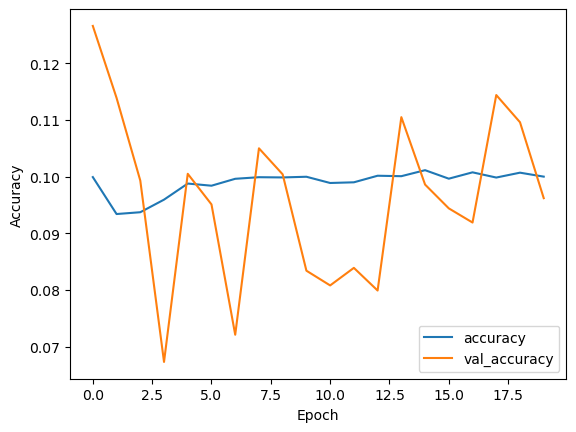

In [10]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy:", test_acc)



313/313 - 3s - loss: 0.8664 - accuracy: 0.0962 - 3s/epoch - 10ms/step
Test accuracy: 0.09619999676942825


In [12]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 4s 11ms/step


              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1000
           1       0.79      0.89      0.84      1000
           2       0.73      0.51      0.60      1000
           3       0.65      0.42      0.51      1000
           4       0.73      0.55      0.62      1000
           5       0.69      0.56      0.62      1000
           6       0.63      0.89      0.73      1000
           7       0.59      0.85      0.70      1000
           8       0.89      0.73      0.80      1000
           9       0.67      0.90      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



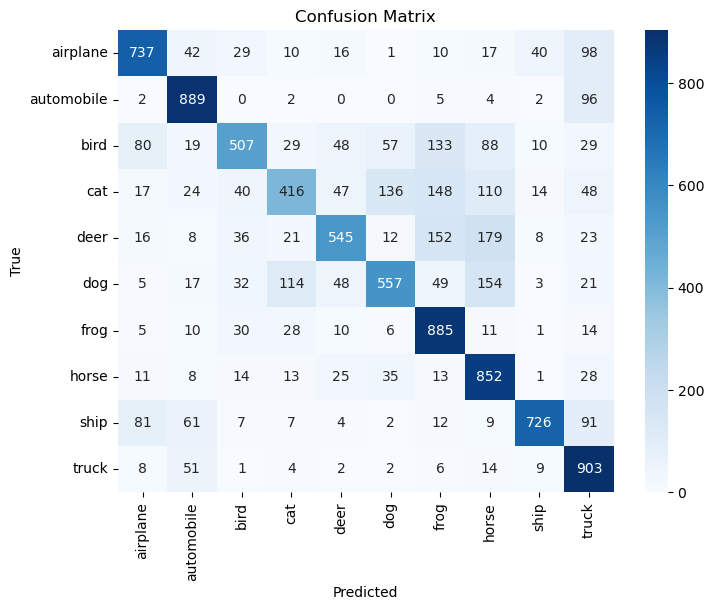

In [15]:
# Generate classification report and confusion matrix
print(classification_report(test_labels, predicted_labels))
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [16]:
# Save the model for deployment
model.save("object_recognition_model.h5")


c:\Users\Rinku Sadh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


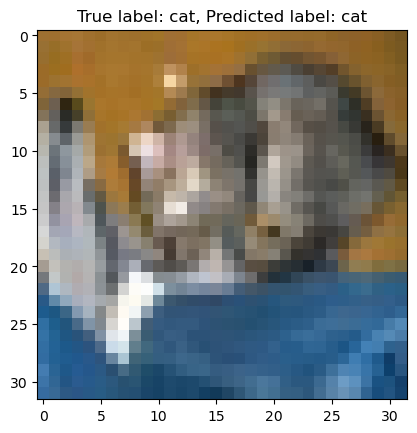

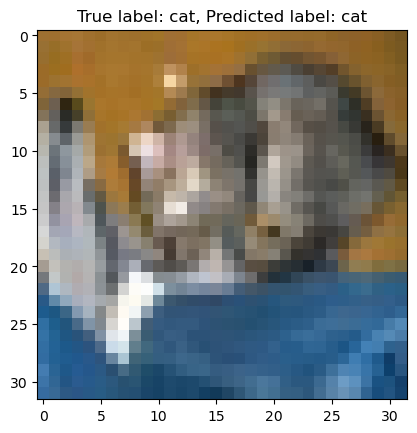

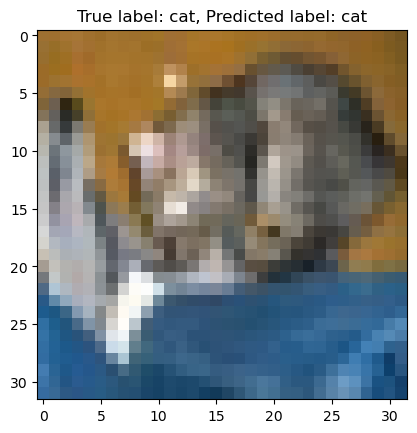

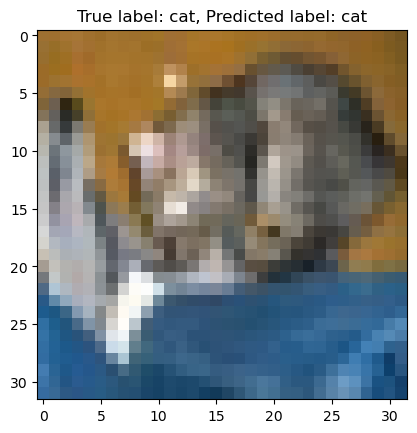

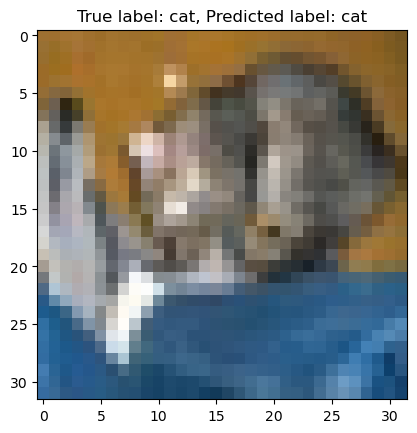

In [17]:
# Error Analysis
incorrect_indices = np.where(predicted_labels != test_labels)[0]
for i in incorrect_indices[:5]:
    plt.imshow(test_images[i])
    plt.title(f"True label: {class_names[test_labels[i][0]]}, Predicted label: {class_names[predicted_labels[i]]}")
    plt.show()


In [22]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(image_path):
    # Load the saved model
    model = tf.keras.models.load_model("object_recognition_model.h5")
    
    # Preprocess the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    input_arr = input_arr / 255.0  # Normalize pixel values to be between 0 and 1
    
    # Make prediction
    predictions = model.predict(input_arr)
    predicted_class = np.argmax(predictions[0])
    
    # Get the class name
    class_name = class_names[predicted_class]
    
    return class_name


In [24]:
# Example usage:
image_path = input('ENTER THE URL OF THE IMAGE')
predicted_class_name = predict_image(image_path)
print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 218ms/step
Predicted class: dog
